In [11]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from sodapy import Socrata
client = Socrata("data.virginia.gov",None)

In [18]:
data = client.get("vsrk-d6hx",limit=30000)
df1= pd.DataFrame.from_records(data)

In [19]:
df1.head()

,report_date,week_ending_date,health_region,vaccination_status,infections,hospitalizations,deaths,population_denominator
0,2022-07-22T00:00:00.000,2022-07-16T00:00:00.000,Central Region,Fully Vaccinated,85,3,0,6295420
1,2022-07-22T00:00:00.000,2022-07-16T00:00:00.000,Central Region,Unvaccinated,3067,13,4,1613249
2,2022-07-22T00:00:00.000,2022-07-16T00:00:00.000,Central Region,Partially Vaccinated,232,2,0,681894
3,2022-07-22T00:00:00.000,2022-07-16T00:00:00.000,Eastern Region,Unvaccinated,3007,38,0,1613249
4,2022-07-22T00:00:00.000,2022-07-16T00:00:00.000,Eastern Region,Partially Vaccinated,309,3,1,681894


In [20]:
df1.shape

(29340, 8)

In [21]:
df1['report_date'] =  pd.to_datetime(df1['report_date'])
df1['week_ending_date'] =  pd.to_datetime(df1['week_ending_date'])
df1['vaccination_status'] = pd.Categorical(df1.vaccination_status)
df1['health_region'] = pd.Categorical(df1.health_region)

In [31]:
df1['infections'] = df1['infections'].astype(str).astype(int)
df1['hospitalizations']=df1['hospitalizations'].astype(str).astype(int)
df1['deaths']=df1['deaths'].astype(str).astype(int)
df1['population_denominator']=df1['population_denominator'].astype(str).astype(int)

In [32]:
df1.dtypes

report_date               datetime64[ns]
week_ending_date          datetime64[ns]
health_region                   category
vaccination_status              category
infections                         int64
hospitalizations                   int64
deaths                             int64
population_denominator             int64
dtype: object

In [33]:
df1['rate_per_100k'] = (df1['infections'] / df1['population_denominator']) * 100000

In [34]:
df1.head()

,report_date,week_ending_date,health_region,vaccination_status,infections,hospitalizations,deaths,population_denominator,rate_per_100k
0,2022-07-22,2022-07-16,Central Region,Fully Vaccinated,85,3,0,6295420,1.350188
1,2022-07-22,2022-07-16,Central Region,Unvaccinated,3067,13,4,1613249,190.113244
2,2022-07-22,2022-07-16,Central Region,Partially Vaccinated,232,2,0,681894,34.022883
3,2022-07-22,2022-07-16,Eastern Region,Unvaccinated,3007,38,0,1613249,186.394041
4,2022-07-22,2022-07-16,Eastern Region,Partially Vaccinated,309,3,1,681894,45.314961


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

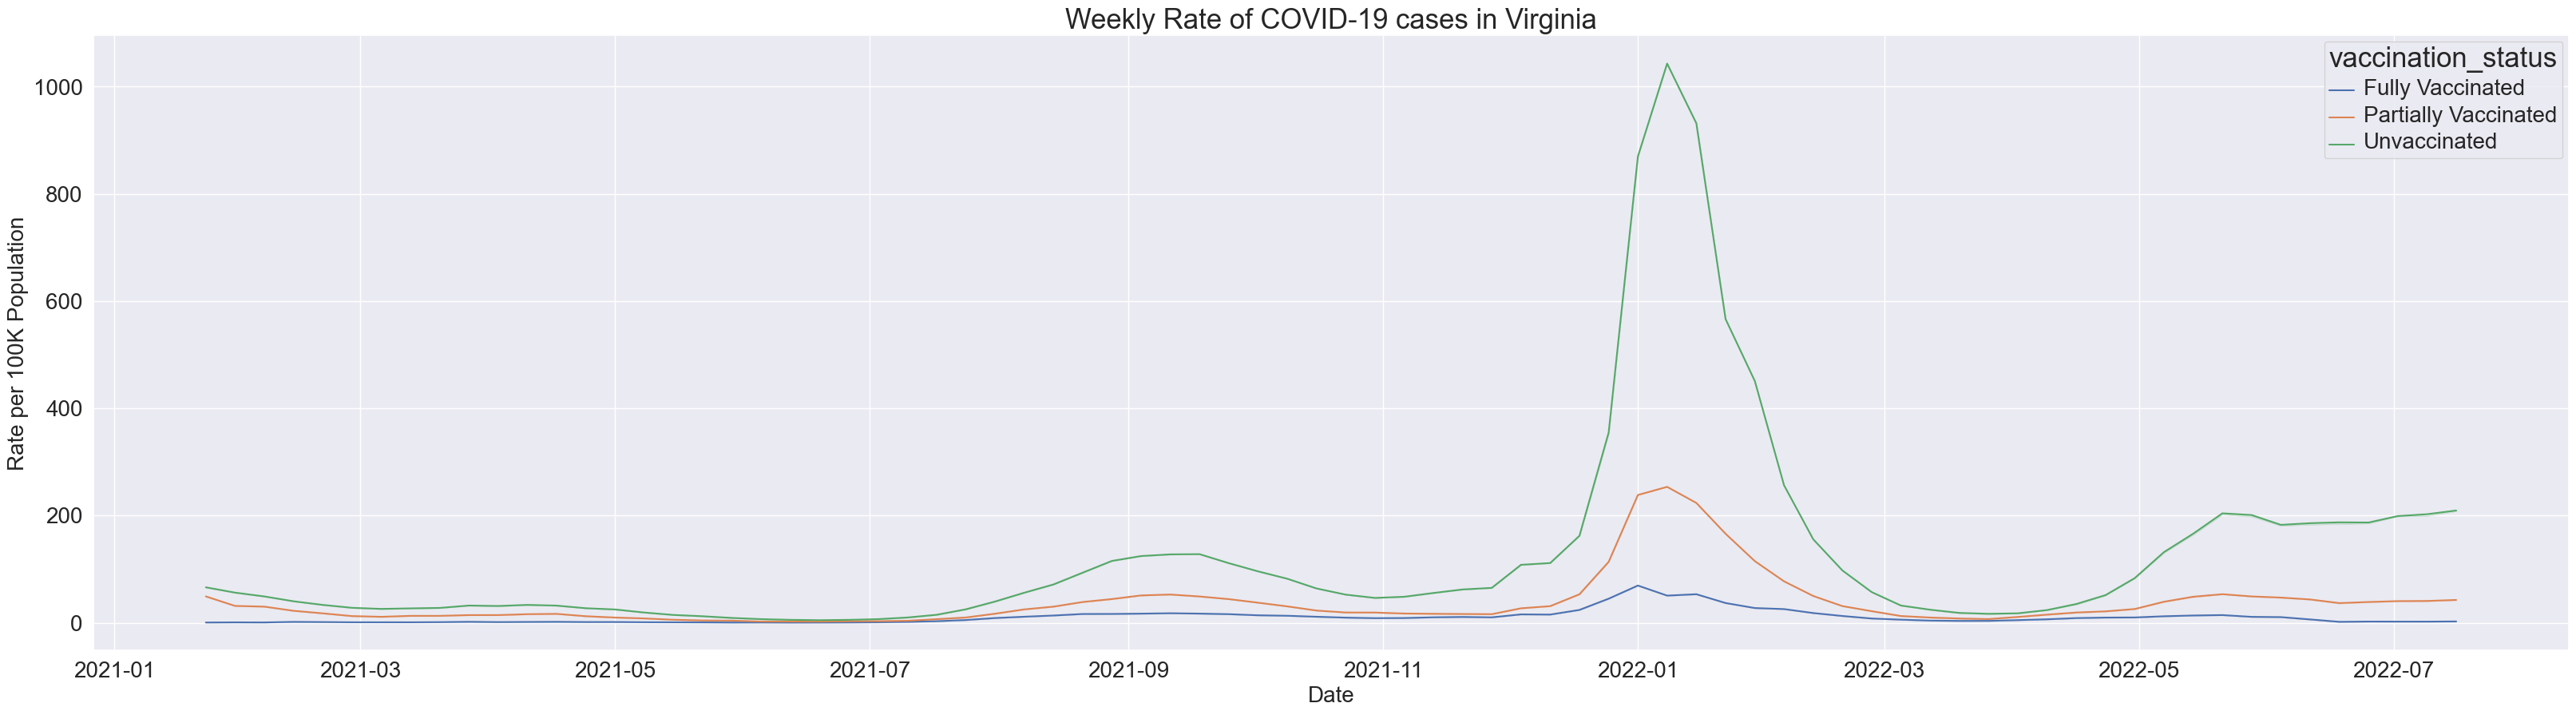

In [36]:
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.lineplot(data=df1, hue='vaccination_status', x='week_ending_date', y='rate_per_100k',ci=0)
sns.set(rc={'figure.figsize':(40,20)})
ax.set_xlabel("Date", fontsize = 20)
ax.set_ylabel("Rate per 100K Population", fontsize = 20)
ax.set_title("Weekly Rate of COVID-19 cases in Virginia",fontsize=25)
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')